SELECT uhrzeit, datum, temp FROM temp WHERE datum BETWEEN %s AND %s
      time        date  temperature
0 23:00:00  2019-02-02         20.0
1 23:00:00  2019-02-02         20.2
2 19:22:47  2019-02-02         20.2
3 19:29:54  2019-02-02         20.2
4 19:31:04  2019-02-02         20.4
DescribeResult(nobs=2379, minmax=(9.4, 22.1), mean=19.1817990752417, variance=4.4282682506131055, skewness=-1.8746296922574912, kurtosis=5.127920669290784)


C:\Users\Rober\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


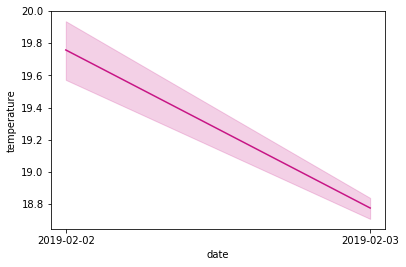

In [2]:
#import libraries
import mysql.connector
import datetime
import pandas as pd
import seaborn as sb
import scipy as sc
import matplotlib.pyplot as plt

%matplotlib inline

# connection to mysql DB on raspberry pi
cnx = mysql.connector.connect(user = 'extern', password = 'raspberry', host = '192.168.0.10', 
                              database = 'sensor', port = '3306')
cursor = cnx.cursor()

# mysql query
write_query = ("INSERT INTO temp " "(uhrzeit, datum, temp, text)" "VALUES (%s, %s, %s, %s)")
read_query = ("SELECT uhrzeit, datum, temp FROM temp " "WHERE datum BETWEEN %s AND %s")
print(read_query)

# date limits for query which data to read
end   = datetime.date.today()
start = end - datetime.timedelta(days = 1)

# execute query
cursor.execute(read_query, (start, end))
results = cursor.fetchall()

# convert to data frame
results = pd.DataFrame(results)
results.columns = ['time', 'date', 'temperature']

results['date'] = results['date'].apply(lambda x: str(x))
results['temperature'] = results['temperature'].apply(lambda x: pd.to_numeric(x))
print(results.head(n = 5))

# statistics
print(sc.stats.describe(pd.to_numeric(results['temperature'])))

# plotting
#sb.lineplot(data = pd.to_numeric(results['temperature']))
sb.lineplot(x = 'date', y = 'temperature', data = results, color = 'mediumvioletred')


# write to database
#data = (datetime.now().time(), datetime.now().date() , '9000', 'heh')
#cursor.execute(write_query, data))
# Make sure data is committed to the database
#cnx.commit()
# disconnect from database
#cursor.close()
#cnx.close()
            